In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import field
import spatial
import timesteppers
from equations import *
from equations2 import SWFull

In [2]:
def plot_2D_field(xm, ym, data):
    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)
    pcm = ax.pcolormesh(xm, ym, data)
    ax.set_aspect(1)
    fig.colorbar(pcm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

<IPython.core.display.Javascript object>


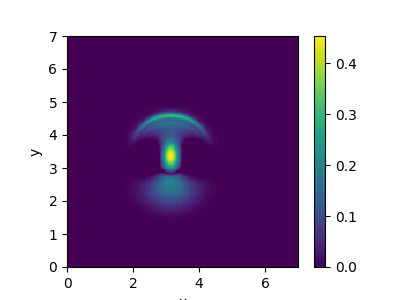

KeyboardInterrupt: 

In [19]:
resolution=200
grid_x = field.UniformPeriodicGrid(resolution, 7)
grid_y = field.UniformPeriodicGrid(resolution, 7)
domain = field.Domain((grid_x, grid_y))
x, y = domain.values()

BT = 0*x + 0.1
IC = np.exp( - ( (x-np.pi)**2 + (y-np.pi)**2 )*8 )

h = field.Field(domain)
u = field.Field(domain)
v = field.Field(domain)
H = field.Field(domain)
X = field.FieldSystem([u,v,h,H])
h.data[:] = IC
u.data[:] = 0*IC
v.data[:] = 0*IC
H.data[:] = BT

g = 9.81
nu = 0
f = 0
b = 0
alpha = 0.1

sw_problem = SWFull(X, 2, g, f, b, nu)
dt = alpha*grid_x.dx

xm, ym = domain.plotting_arrays()

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
pcm = ax.pcolormesh(xm, ym, h.data)
ax.set_aspect(1)
fig.colorbar(pcm)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.canvas.draw()
while sw_problem.t < 1 - 1e-5:
    sw_problem.step(dt)
    if sw_problem.iter % 10 == 0:
        pcm.set_array(np.ravel(h.data))
        pcm.set_clim([0,np.max(h.data)])
        fig.canvas.draw()

/Users/richardsuhendra/opt/miniconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


<IPython.core.display.Javascript object>


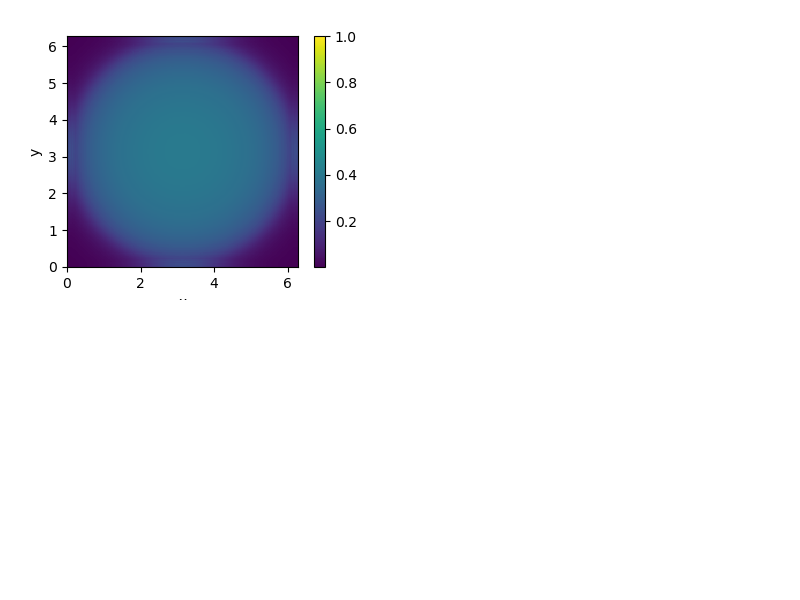

0.9986953580624016
0.9945192892369752
0.9875624087861631
0.977974914940824
0.9659575791295766
0.9517503350499854
0.9356196976558036
0.9178462131107822
0.8987129409708349
0.8784956697716384
0.8574552412711762
0.8358320665852875
0.813842694851018
0.7916781532126972
0.769503709267432
0.7474596972057354
0.725663077487644
0.7042094495526641
0.6831752943372656
0.6626202792837382
0.6425895079601883
0.6231156371591718
0.6042208160915324
0.5859184258207725
0.5682146136728752
0.5511096284152619
0.5345989688487349


In [ ]:
resolution=200
grid_x = field.UniformPeriodicGrid(resolution, 2*np.pi)
grid_y = field.UniformPeriodicGrid(resolution, 2*np.pi)
domain = field.Domain((grid_x, grid_y))
x, y = domain.values()

BT = np.sin(x)*np.sin(y)
IC = np.exp( - ( (x-np.pi)**2 + (y-np.pi)**2 )*0.3 )

h = field.Field(domain)
u = field.Field(domain)
v = field.Field(domain)
H = field.Field(domain)

# X = field.FieldSystem([u,v,h,H])
X = field.FieldSystem([h,u,v])
h.data[:] = IC
u.data[:] = 0*IC
v.data[:] = 0*IC
H.data[:] = BT

g = 9.81
nu = 0
f = 0
b = 0

alpha = 0.05

sw = SW(X, 2, g, f, b)
sw_problem=timesteppers.ForwardEuler(sw)
dt = alpha*grid_x.dx

xm, ym = domain.plotting_arrays()

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
pcm = ax.pcolormesh(xm, ym, h.data)
ax.set_aspect(1)
fig.colorbar(pcm)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.canvas.draw()
while sw_problem.t < 1 - 1e-5:
    sw_problem.step(dt)
    if sw_problem.iter % 10 == 0:
        pcm.set_array(np.ravel(h.data))
        #pcm.set_clim([0,np.max(h.data)])
        print(np.max(h.data))
        fig.canvas.draw()
print('done')